In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Some matplotlib settings
mpl_params = {
    "axes.titlesize": 20,
    "figure.figsize": (12, 4),
}
plt.rcParams.update(mpl_params)

In [6]:
# from networkx.readwrite import json_graph
import json

# load json-ed networkx datafile
with open("tesla_network.json") as infile:
    G = nx.json_graph.node_link_graph(json.load(infile))

In [7]:
print(G)


Graph with 385 nodes and 0 edges


In [8]:
# example node data structure keyed on geohash of GPS cords
G.nodes["dr7k46ycwwb8"]

{'SC_index': 173,
 'geohash': 'dr7k46ycwwb8',
 'weight': 0.00014093906625032375,
 'GPS_lon_lat': [-74.07126104459167, 41.49977498687804],
 'lat': 41.49977498687804,
 'lon': -74.07126104459167,
 'population': 28101,
 'pos': [0.8123107474668945, 0.42622282744786055],
 'GPS': [41.49977498687804, -74.07126104459167]}

In [9]:
# extract pos and weight attributes for use in models
nodes = G.nodes()
pos = nx.get_node_attributes(G, "pos")
weight = nx.get_node_attributes(G, "weight")

In [21]:
node_opts = {"node_size": 50, "node_color": "blue", "alpha": 0.4}
edge_opts = {"edge_color": "k"}

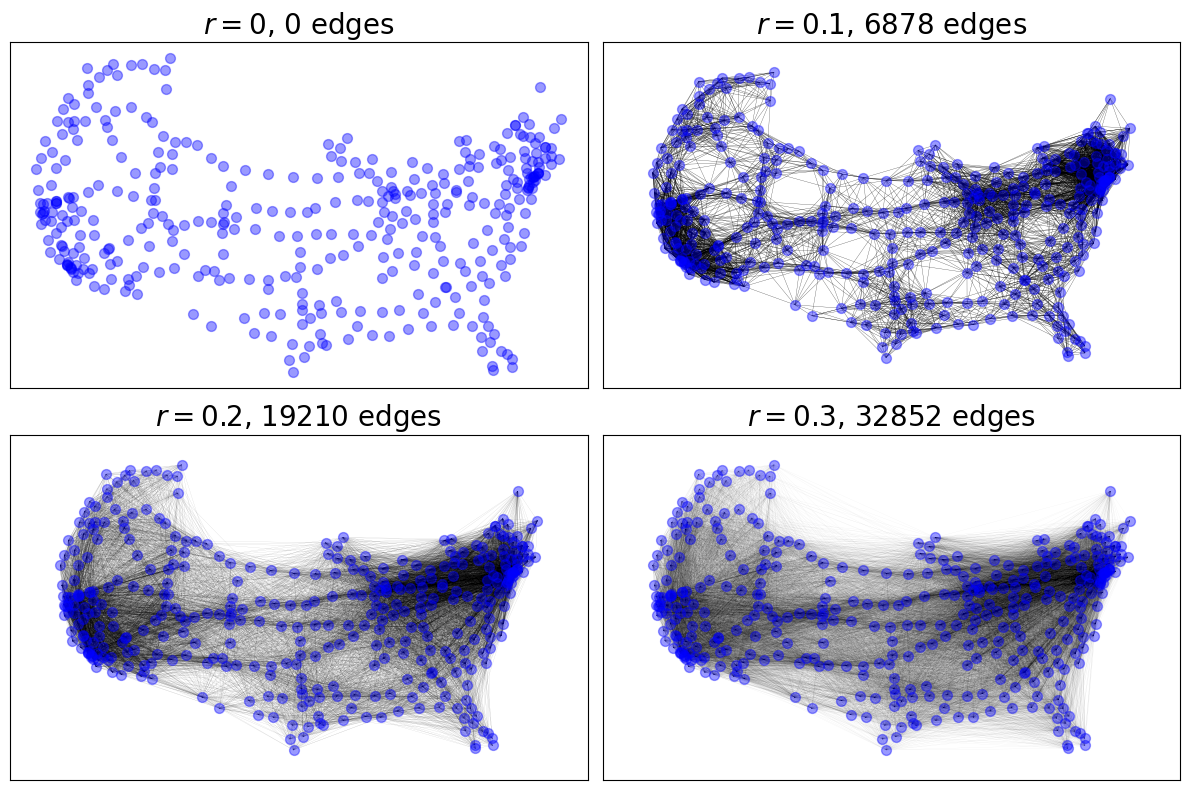

In [22]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Define parameters for visualizing edges
alphas = (0.8, 0.8, 0.3, 0.1)
linewidths = (0.2, 0.2, 0.1, 0.1)
radii = (0, 0.1, 0.2, 0.3)

# Iterate over each subplot
for r, ax, alpha, lw in zip(radii, axes.ravel(), alphas, linewidths):
    # Create a random geometric graph
    RGG = nx.random_geometric_graph(nodes, radius=r, pos=pos)
    
    # Draw the nodes
    nx.draw_networkx_nodes(G, pos=pos, ax=ax, **node_opts)
    
    # Draw the edges
    nx.draw_networkx_edges(RGG, pos=pos, ax=ax, alpha=alpha, width=lw, **edge_opts)
    
    # Set the subplot title
    ax.set_title(f"$r = {r}$, {RGG.number_of_edges()} edges")

# Adjust the spacing between subplots
fig.tight_layout()

# Display the figure
plt.show()


In [23]:
# Make edge visualization more prominent (and consistent) for the following
# examples
edge_opts["alpha"] = 0.8
edge_opts["width"] = 0.2

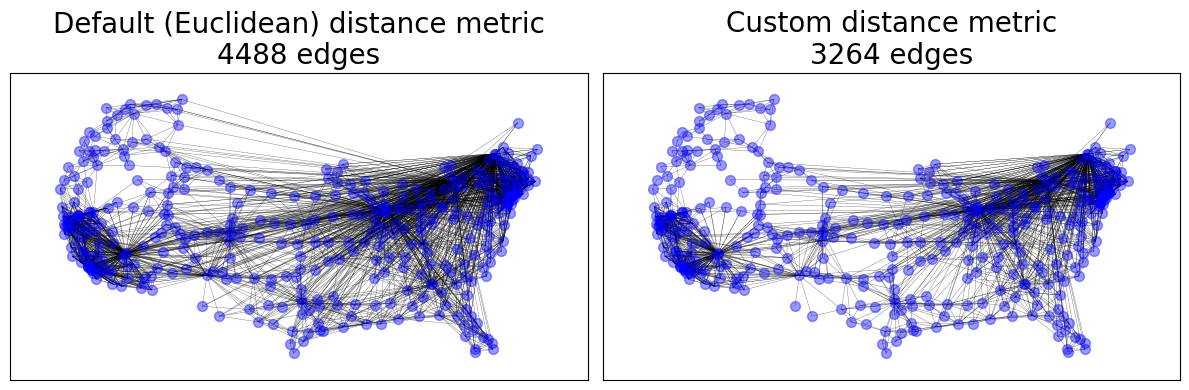

In [24]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2)

# Custom distance metric function
dist = lambda x, y: sum(abs(a - b) for a, b in zip(x, y))

# Define distance metrics
distance_metrics = {
    "Default (Euclidean) distance metric": None,  # Euclidean distance
    "Custom distance metric": dist,
}

# Iterate over each distance metric and subplot
for (name, metric), ax in zip(distance_metrics.items(), axes.ravel()):
    # Create a geographical threshold graph
    GTG = nx.geographical_threshold_graph(nodes, 0.1, pos=pos, weight=weight, metric=metric)
    
    # Draw the nodes
    nx.draw_networkx_nodes(G, pos=pos, ax=ax, **node_opts)
    
    # Draw the edges
    nx.draw_networkx_edges(GTG, pos=pos, ax=ax, **edge_opts)
    
    # Set the subplot title
    ax.set_title(f"{name}\n{GTG.number_of_edges()} edges")

# Adjust the spacing between subplots
fig.tight_layout()

# Display the figure
plt.show()


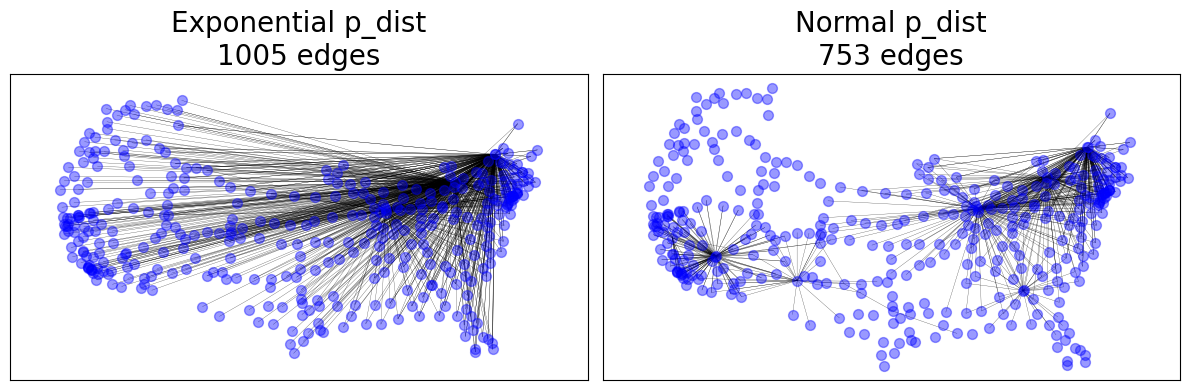

In [25]:
import matplotlib.pyplot as plt
import networkx as nx
import math
from scipy.stats import norm

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2)

# Define different p_dists
p_dists = {
    "Exponential p_dist": lambda d: math.exp(-d),
    "Normal p_dist": norm(loc=0.1, scale=0.1).pdf,
}

# Iterate over each p_dist and subplot
for (name, p_dist), ax in zip(p_dists.items(), axes.ravel()):
    # Create a geographical threshold graph with specified p_dist
    GTG = nx.geographical_threshold_graph(nodes, 0.01, pos=pos, weight=weight, metric=dist, p_dist=p_dist)
    
    # Draw the nodes
    nx.draw_networkx_nodes(G, pos=pos, ax=ax, **node_opts)
    
    # Draw the edges
    nx.draw_networkx_edges(GTG, pos=pos, ax=ax, **edge_opts)
    
    # Set the subplot title
    ax.set_title(f"{name}\n{GTG.number_of_edges()} edges")

# Adjust the spacing between subplots
fig.tight_layout()

# Display the figure
plt.show()


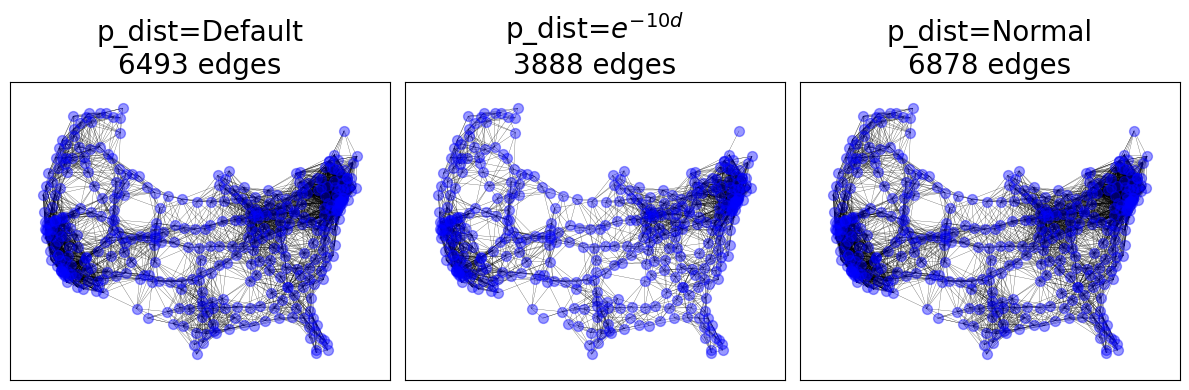

In [26]:
import matplotlib.pyplot as plt
import networkx as nx
import math
from scipy.stats import norm

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3)

# Define different PDFs
pdfs = {
    "Default": None,  # Default: exponential distribution with `lambda=1`
    r"$e^{-10d}$": lambda d: math.exp(-10 * d),
    "Normal": norm(loc=0.1, scale=0.1).pdf,
}

# Iterate over each PDF and subplot
for (title, pdf), ax in zip(pdfs.items(), axes.ravel()):
    # Create a soft random geometric graph with the specified PDF
    SRGG = nx.soft_random_geometric_graph(nodes, 0.1, pos=pos, p_dist=pdf)
    
    # Draw the nodes
    nx.draw_networkx_nodes(G, pos=pos, ax=ax, **node_opts)
    
    # Draw the edges
    nx.draw_networkx_edges(SRGG, pos=pos, ax=ax, **edge_opts)
    
    # Set the subplot title
    ax.set_title(f"p_dist={title}\n{SRGG.number_of_edges()} edges")

# Adjust the spacing between subplots
fig.tight_layout()

# Display the figure
plt.show()


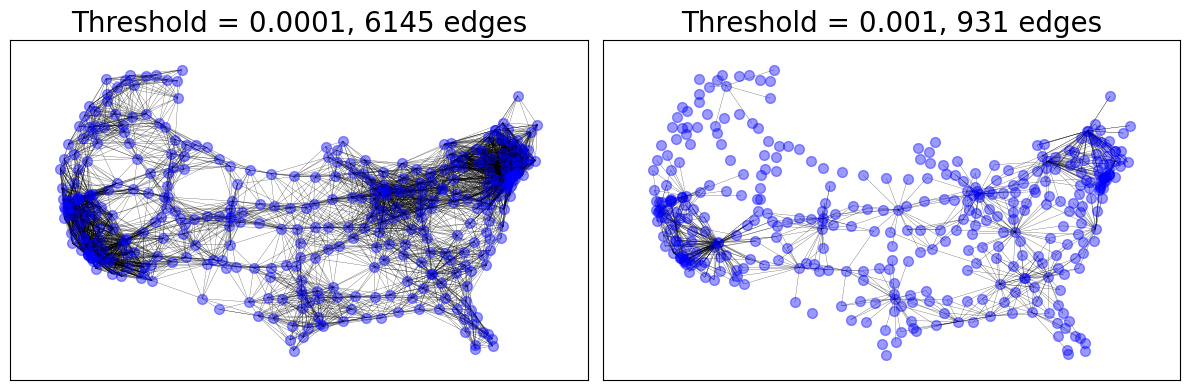

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2)

# Define the threshold values
thresholds = (0.0001, 0.001)

# Iterate over each threshold value and subplot
for thresh, ax in zip(thresholds, axes):
    # Create a thresholded random geometric graph with the specified threshold
    TRGG = nx.thresholded_random_geometric_graph(nodes, 0.1, thresh, pos=pos, weight=weight)
    
    # Draw the nodes
    nx.draw_networkx_nodes(G, pos=pos, ax=ax, **node_opts)
    
    # Draw the edges
    nx.draw_networkx_edges(TRGG, pos=pos, ax=ax, **edge_opts)
    
    # Set the subplot title
    ax.set_title(f"Threshold = {thresh}, {TRGG.number_of_edges()} edges")

# Adjust the spacing between subplots
fig.tight_layout()

# Display the figure
plt.show()
